### Which commsec pocket aus-etfs sould I choose??
<p><img style="float: left ; margin: 5px 20px 5px 1px;" width="400" src="Commsec Pocket.jpg"></p>

I invest some of my money in a 'Dollar-cost averaging' way due to time limit and defensive investor nature. Since CBA released CommSec Pocket App last year, I am triggerd by its mere $2 brokerage. However, I am also an advocate of Graham's investment philosophy, invest only if you would be comfortable owning a stock even if you had no way of knowing its daily share price, so I would like to apply my fresh data analysis skill (I recently pick up the skill) into my limited financial planning experience in line with what I have learnt back in uni to see how I am comfortable with these ETF options.


#### Disclaimer
My analysis is for reference only – it is not designed to be, nor should it be regarded, as professional advice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
%matplotlib inline

etf_data = pd.read_csv('etf_data.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()
ASX200_data = pd.read_csv('ASX200_data.csv', 
    parse_dates=['Date'],
    index_col='Date'
    ).dropna()

In [2]:
# Display summary
print('ETF Data\n')
etf_data["IOZ"] = pd.to_numeric(etf_data.IOZ, errors='coerce')
etf_data.info()
print(etf_data.head())

print('\nBenchmarks\n')
print('\nBenchmarks\n')
ASX200_data.info()
ASX200_data.head()

ETF Data

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2492 entries, 2010-01-12 to 2020-08-10
Data columns (total 2 columns):
IOZ    2491 non-null float64
SYI    2492 non-null float64
dtypes: float64(2)
memory usage: 58.4 KB
              IOZ    SYI
Date                    
2010-01-12  19.98  24.18
2010-02-12  20.15  24.63
2010-03-12  20.03  24.69
2010-06-12  20.21  24.61
2010-07-12  20.23  24.77

Benchmarks


Benchmarks

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2486 entries, 2010-01-12 to 2020-08-10
Data columns (total 1 columns):
index    2486 non-null float64
dtypes: float64(1)
memory usage: 38.8 KB


,index
Date,
2010-01-12,4586.6
2010-02-12,4676.2
2010-03-12,4694.2
2010-06-12,4688.6
2010-07-12,4726.8


,IOZ,SYI
count,2491.000000,2492.000000
mean,22.811421,27.388933
std,2.584450,2.767244
min,16.680000,19.040000
25%,21.160000,25.120000
50%,23.150000,28.360000
75%,24.470000,29.590000
max,29.250000,32.900000


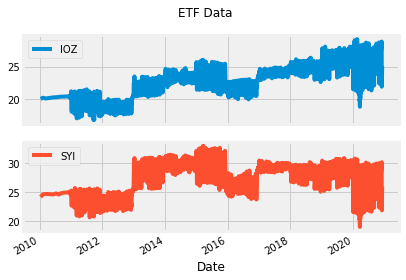

In [3]:
# visualize and summarise the aus-etf data
etf_data.plot(title='ETF Data', subplots=True);

etf_data.describe()

,index
count,2486.000000
mean,5414.839783
std,700.141481
min,3863.900000
25%,4960.950000
50%,5435.350000
75%,5894.600000
max,7162.500000


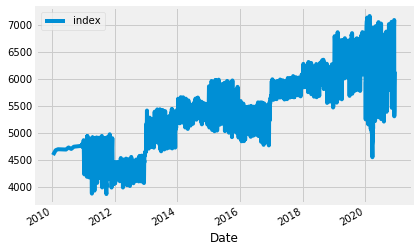

In [4]:
# visualize and summarise the asx200 data
ASX200_data.plot();
ASX200_data.describe()

,IOZ,SYI
count,2491.000000,2491.000000
mean,0.000143,0.000070
std,0.010070,0.010439
min,-0.096760,-0.094194
25%,-0.004689,-0.004714
50%,0.000514,0.000396
75%,0.005309,0.005475
max,0.070070,0.069326


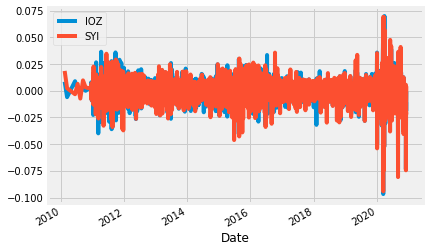

In [5]:
# calculate and visualise daily aus-etf returns
etf_returns = etf_data.pct_change()
etf_returns.plot()
etf_returns.describe()

count    2485.000000
mean        0.000165
std         0.009982
min        -0.096998
25%        -0.004432
50%         0.000605
75%         0.005211
max         0.070007
Name: index, dtype: float64

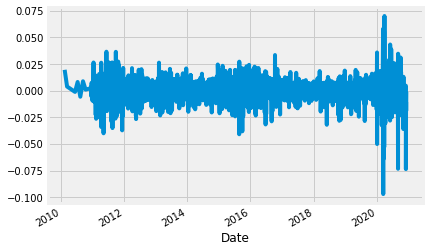

In [6]:
# calculate daily benchmark_data returns
ASX200_returns = ASX200_data['index'].pct_change()
ASX200_returns.plot();
ASX200_returns.describe()

,IOZ,SYI
count,2482.000000,2482.000000
mean,-0.000019,-0.000083
std,0.011109,0.003168
min,-0.054956,-0.030749
25%,-0.005323,-0.001510
50%,0.000024,0.000008
75%,0.004567,0.001483
max,0.070630,0.027379


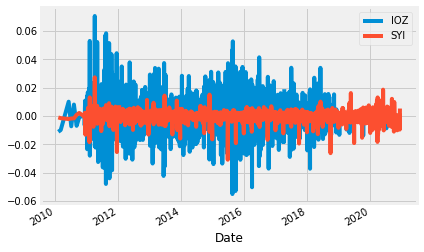

In [7]:
# calculate the difference in daily returns
excess_returns = etf_returns.sub(ASX200_returns, axis=0)

# plot the excess_returns
excess_returns.plot();

# summarize the excess_returns
excess_returns.describe()

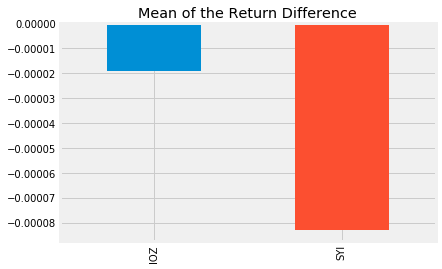

In [8]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference');

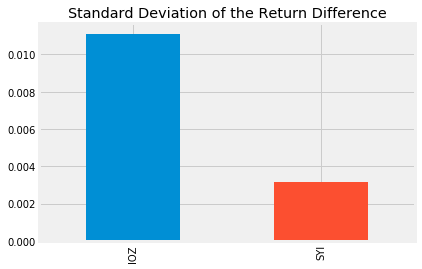

In [9]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference');

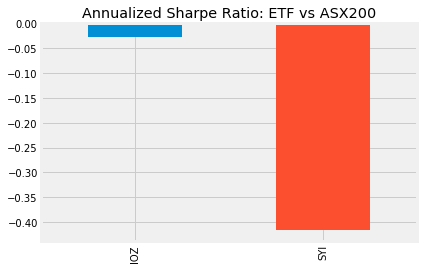

In [10]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

# plot the annualized sharpe ratio 
annual_sharpe_ratio.plot.bar(title='Annualized Sharpe Ratio: ETF vs ASX200');

hmmmm.. since IOZ try to replicate ASX 200 index, IOZ shows relatively better sharpe ratio compared to SYI,(though both appear to be negative ratio). Due to the fact that SYI is designed to reflect the performance of listed Australian companies with relatively high dividend income and quality characteristics with the potential for franked dividend income, COVID-19 has a significantly impact on these companies. However, past Performance is not a reliable indicator of future results, and we may need to take a second look into these two ETFs once you are ready to invest into these funds.   